<IPython.core.display.Javascript object>


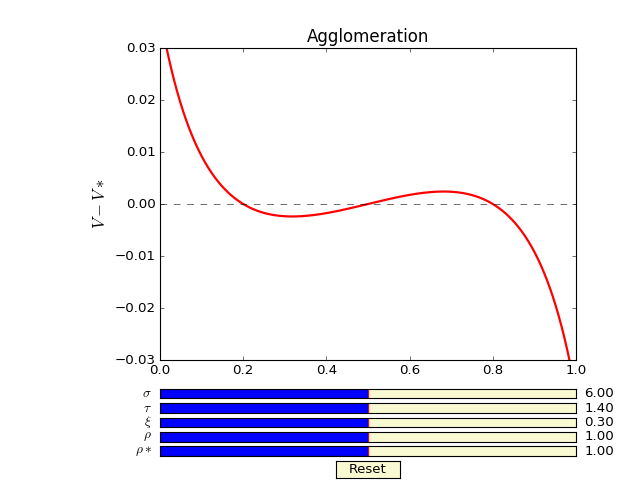

In [2]:
#Import stuff
from numpy import log
from scipy import arange
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.widgets import Slider, Button, RadioButtons

#Parameters first graph

def valuefunction1(tao1, sigma1, xi1, rho1, rhof1):
    return (xi1/(sigma1-1))*log((h+(tao1**(1-sigma1))*(1-h))/(1-h+(tao1**(1-sigma1))*h))+(xi1*(1-(tao1**(1-sigma1)))/sigma1)*(((rho1+h)/(h+(tao1**(1-sigma1))*(1-h)))-((rhof1+1-h)/(1-h+(tao1**(1-sigma1))*h)))

axis_color = 'lightgoldenrodyellow'
fig = plt.figure()
plt.title("Agglomeration",fontsize = 15)
plt.ylabel("$V-V*$",fontsize = 15)

# Draw the plot
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)
h = arange(0.0, 1.0, 0.001)
tao1_0 = 1.4
sigma1_0 = 6
xi_0=0.3
rho_0 = 1
rhof_0 = 1
[line] = ax.plot(h, valuefunction1(tao1_0, sigma1_0, xi_0, rho_0, rhof_0), linewidth=2, color='red')
plt.axhline(y=0, xmin=0, xmax=1, linestyle='--', c="black", linewidth=0.5, hold=None)
ax.set_xlim([0, 1])
ax.set_ylim([-0.03, 0.03])

# Add two sliders for tweaking the parameters
freq_slider_ax = fig.add_axes([0.25, 0.14, 0.65, 0.02], axisbg=axis_color)
freq_slider = Slider(freq_slider_ax, r'$\tau$', 1.1, 1.7, valinit=tao1_0)
sigma_slider_ax = fig.add_axes([0.25, 0.17, 0.65, 0.02], axisbg=axis_color)
sigma_slider = Slider(sigma_slider_ax, r'$\sigma$', 4, 8, valinit=sigma1_0)
xi_slider_ax = fig.add_axes([0.25, 0.11, 0.65, 0.02], axisbg=axis_color)
xi_slider = Slider(xi_slider_ax, r'$\xi$', 0.1, 0.5, valinit=xi_0)
rho_slider_ax = fig.add_axes([0.25, 0.08, 0.65, 0.02], axisbg=axis_color)
rho_slider = Slider(rho_slider_ax, r'$\rho$', 0.5, 1.5, valinit=rho_0)
rhof_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.02], axisbg=axis_color)
rhof_slider = Slider(rhof_slider_ax, r'$\rho*$', 0.5, 1.5, valinit=rhof_0)

def sliders_on_changed(val):
    line.set_ydata(valuefunction1(freq_slider.val, sigma_slider.val, xi_slider.val, rho_slider.val, rhof_slider.val))
    fig.canvas.draw_idle()
    
freq_slider.on_changed(sliders_on_changed)
sigma_slider.on_changed(sliders_on_changed)
xi_slider.on_changed(sliders_on_changed)
rho_slider.on_changed(sliders_on_changed)
rhof_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.525, 0.005, 0.1, 0.035])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    sigma_slider.reset()
    xi_slider.reset()
    rho_slider.reset()
    rhof_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

plt.show()